Exploring grs copy number in Archaeal communities

In [1]:
import pandas as pd
import glob
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#gene name, change for gene of interest
gene = "grs_fam"

#path to a gene-specific folder for outputs from jupyter notebook analysis
output_folder= "/global/cfs/cdirs/m342/lblum/hotsprings_metaG/jupyter_notebooks/outputs/grs_fam"

#location of the gene-specific set of extracted amino acid sequences from the hmmer searches
hits_results_path= "/global/cfs/cdirs/m342/lblum/hotsprings_metaG/results/hmm_results/grs_fam/*.faa"

#path of the file of combined grs hits from both rounds, reduced to remove redundant hits.
hits_file= os.path.join(output_folder,gene+"_reduced_hits.fasta")

#threshold hits table with sample
threshold_hits = pd.read_csv(os.path.join(output_folder,gene+"_combo_threshold_hits_table.csv"))

#sample metadata
sample_meta = pd.read_csv('/global/cfs/cdirs/m342/lblum/hotsprings_metaG/metadata/thermal_springs_genomes_meta_pH_range.csv', header = 0, index_col = 0)

#sample_path
sample_path = "/projectb/sandbox/IMG/img_web_data_merfs"

In [3]:
ten_otus = ["COG0012", "COG0016", "COG0018", "COG0172", "COG0215", "COG0495", "COG0525", "COG0533", "COG0541", "COG0552"]

In [4]:
def sample_counts():
    """
    Get counts of grs homologs by sample.
    """
    sample_counts = threshold_hits.groupby('sample_id').count()
    sample_counts_info = pd.merge(sample_counts, sample_meta, left_index = True,right_on = 'taxon_oid')
    return sample_counts_info

In [5]:
def count_cogs_10():
    """
    Find average count of 10 COGs used as single copy marker OTUs in a metagenome sample.
    Use this count to generate an average grs copy number for a metagenome.
    """
    mean_cog_count = []
    avg_grs_copies = []
    for sample, row in sample_counts_info.iterrows():
        cog_count = Path(os.path.join(sample_path, str(sample), "cog_count_both.txt"))
    
        if cog_count.exists():   
            with open(cog_count, "r") as cog_file:
                cogs = pd.read_csv(cog_file, index_col = None, sep = "\t", header = None, names = ['COG', 'count'])
                cog_10 = cogs[cogs['COG'].isin(ten_otus)]
                mean_cog_10 = cog_10['count'].mean()
                mean_cog_count.append(mean_cog_10)
                avg_grs = row['contig_id']/mean_cog_10
                avg_grs_copies.append(avg_grs)
            
        else:
            mean_cog_count.append('nan')
            avg_grs_copies.append('nan')
            
    sample_counts_info_cog = sample_counts_info
    sample_counts_info_cog['mean_cog_count'] = mean_cog_count  
    sample_counts_info_cog['avg_grs_copy_num'] = avg_grs_copies
    return sample_counts_info_cog

In [6]:
sample_counts_info = sample_counts()

In [7]:
sample_counts_info_cog = count_cogs_10()

In [8]:
sample_counts_info_cog = sample_counts_info_cog.drop(638154517)

In [14]:
sample_counts_info_cog

,contig_id,e-value,Domain,Sequencing Status,Study Name,Genome Name / Sample Name,Sequencing Center,IMG Genome ID,GOLD Analysis Project Type,GOLD Sequencing Project ID,...,Gene Count * assembled,Genome Bin Count * assembled,temperature_num,pH_num,pH_low,pH_high,pH_avg,pH_range,mean_cog_count,avg_grs_copy_num
taxon_oid,,,,,,,,,,,,,,,,,,,,,
2009439000,3,3,*Microbiome,Draft,Hot spring microbial communities from Bison Sp...,2_050719S,DOE Joint Genome Institute (JGI),2.009439e+09,Metagenome Analysis,Gp0050992,...,51132,1.0,85.0,NaN,NaN,NaN,NaN,NaN,27.5,0.109091
2009439003,5,5,*Microbiome,Draft,Hot spring microbial communities from Bison Sp...,1_050719N,DOE Joint Genome Institute (JGI),2.009439e+09,Metagenome Analysis,Gp0050995,...,40864,1.0,80.0,7.550,7.550,7.550,7.550,0.0,26.0,0.192308
2010170001,1,1,*Microbiome,Draft,Hot spring microbial communities from Bison Sp...,3_050719R,DOE Joint Genome Institute (JGI),2.010170e+09,Metagenome Analysis,Gp0050996,...,43764,0.0,80.0,NaN,NaN,NaN,NaN,NaN,23.0,0.043478
2010170002,1,1,*Microbiome,Draft,Hot spring microbial communities from Bison Sp...,4_050719Q,DOE Joint Genome Institute (JGI),2.010170e+09,Metagenome Analysis,Gp0050994,...,84577,1.0,74.0,NaN,NaN,NaN,NaN,NaN,32.9,0.030395
2012990006,5,5,*Microbiome,Permanent Draft,Hot spring microbial communities from Yellowst...,Hot spring microbial communities from Joseph's...,NaN,2.012990e+09,Metagenome Analysis,Gp0051306,...,10153,1.0,80.0,NaN,6.000,6.200,6.100,0.2,6.2,0.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300045899,19,19,*Microbiome,Permanent Draft,Hot spring sediment microbial communities from...,Hot spring sediment microbial communities from...,"University of Wisconsin, Madison",3.300046e+09,Metagenome Analysis,Gp0569487,...,104302,NaN,78.3,5.798,5.798,5.798,5.798,0.0,40.0,0.475
3300045900,57,57,*Microbiome,Permanent Draft,Hot spring sediment microbial communities from...,Hot spring sediment microbial communities from...,"University of Wisconsin, Madison",3.300046e+09,Metagenome Analysis,Gp0569476,...,1342260,NaN,67.8,6.301,6.301,6.301,6.301,0.0,544.8,0.104626
3300045901,12,12,*Microbiome,Permanent Draft,Hot spring sediment microbial communities from...,Hot spring sediment microbial communities from...,"University of Wisconsin, Madison",3.300046e+09,Metagenome Analysis,Gp0569467,...,53832,NaN,91.3,1.285,1.285,1.285,1.285,0.0,14.5,0.827586


In [145]:
def grs_copies_plot_pH():
    #Plot of sample temperature and pH with visualized pH ranges when specified instead of a single value
    #specify a data frame to use
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()

    g = ax.errorbar(sample_counts_info_cog['pH_avg'], sample_counts_info_cog['avg_grs_copy_num'], yerr = None, xerr = sample_counts_info_cog['pH_range']/2, c = 'brown',fmt='o', markersize = 4)
    plt.xlabel('Sample pH', fontsize = 20)
    plt.ylabel("mean grs copy number", fontsize = 20)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlim(1, 12)
    plt.show()

In [146]:
def grs_copies_plot_temp():
    #Plot of sample temperature and pH with visualized pH ranges when specified instead of a single value
    #specify a data frame to use
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()

    g = ax.errorbar(sample_counts_info_cog['temperature_num'], sample_counts_info_cog['avg_grs_copy_num'], yerr = None, xerr = sample_counts_info_cog['pH_range']/2, c = 'brown',fmt='o', markersize = 4)
    plt.xlabel('Sample temp', fontsize = 20)
    plt.ylabel("mean grs copy number", fontsize = 20)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()

(array([ 5.,  3.,  7.,  0., 19., 11., 23., 53., 59., 38.]),
 array([10.  , 18.27, 26.54, 34.81, 43.08, 51.35, 59.62, 67.89, 76.16,
        84.43, 92.7 ]),
 <BarContainer object of 10 artists>)

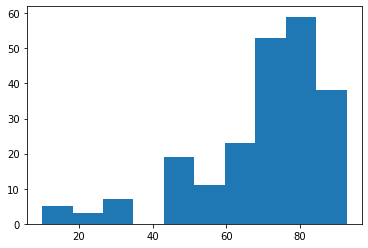

In [150]:
plt.hist(sample_counts_info_cog['temperature_num'])

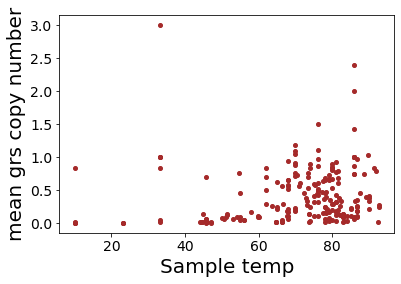

In [148]:
grs_copies_plot_temp()

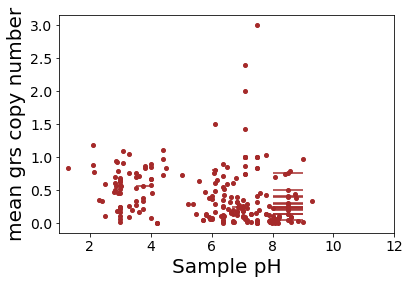

In [149]:
grs_copies_plot_pH()